## Glassdoor Data Science Jobs and Salaries Project

In [167]:
# Import libraries and load the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

# Load
df = pd.read_csv('glassdoor_jobs.csv')

In [168]:
df.head(2)

Unnamed: 0                  Job Title              Salary Estimate  \
0           0             Data Scientist   $53K-$91K (Glassdoor est.)   
1           1  Healthcare Data Scientist  $63K-$112K (Glassdoor est.)   

                                     Job Description  Rating  \
0  Data Scientist\nLocation: Albuquerque, NM\nEdu...     3.8   
1  What You Will Do:\n\nI. General Summary\n\nThe...     3.4   

                                 Company Name         Location   Headquarters  \
0                      Tecolote Research\n3.8  Albuquerque, NM     Goleta, CA   
1  University of Maryland Medical System\n3.4    Linthicum, MD  Baltimore, MD   

                    Size  Founded   Type of ownership  \
0  501 to 1000 employees     1973   Company - Private   
1       10000+ employees     1984  Other Organization   

                           Industry               Sector  \
0               Aerospace & Defense  Aerospace & Defense   
1  Health Care Services & Hospitals          Health Care   

                     Revenue Competitors  
0  $50 to $100 million (USD)          -1  
1     $2 to $5 billion (USD)          -1

In [169]:
df = df.drop(columns=["Unnamed: 0"])
df.head(2)

Job Title              Salary Estimate  \
0             Data Scientist   $53K-$91K (Glassdoor est.)   
1  Healthcare Data Scientist  $63K-$112K (Glassdoor est.)   

                                     Job Description  Rating  \
0  Data Scientist\nLocation: Albuquerque, NM\nEdu...     3.8   
1  What You Will Do:\n\nI. General Summary\n\nThe...     3.4   

                                 Company Name         Location   Headquarters  \
0                      Tecolote Research\n3.8  Albuquerque, NM     Goleta, CA   
1  University of Maryland Medical System\n3.4    Linthicum, MD  Baltimore, MD   

                    Size  Founded   Type of ownership  \
0  501 to 1000 employees     1973   Company - Private   
1       10000+ employees     1984  Other Organization   

                           Industry               Sector  \
0               Aerospace & Defense  Aerospace & Defense   
1  Health Care Services & Hospitals          Health Care   

                     Revenue Competitors  
0  $50 to $100 million (USD)          -1  
1     $2 to $5 billion (USD)          -1

In [170]:
df.shape

(956, 14)

In [171]:
df.columns.tolist()

['Job Title',
 'Salary Estimate',
 'Job Description',
 'Rating',
 'Company Name',
 'Location',
 'Headquarters',
 'Size',
 'Founded',
 'Type of ownership',
 'Industry',
 'Sector',
 'Revenue',
 'Competitors']

In [172]:
# Check missing values
df.isnull().sum()

Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
dtype: int64

In [173]:
df.dtypes

Job Title             object
Salary Estimate       object
Job Description       object
Rating               float64
Company Name          object
Location              object
Headquarters          object
Size                  object
Founded                int64
Type of ownership     object
Industry              object
Sector                object
Revenue               object
Competitors           object
dtype: object

## Explore the data

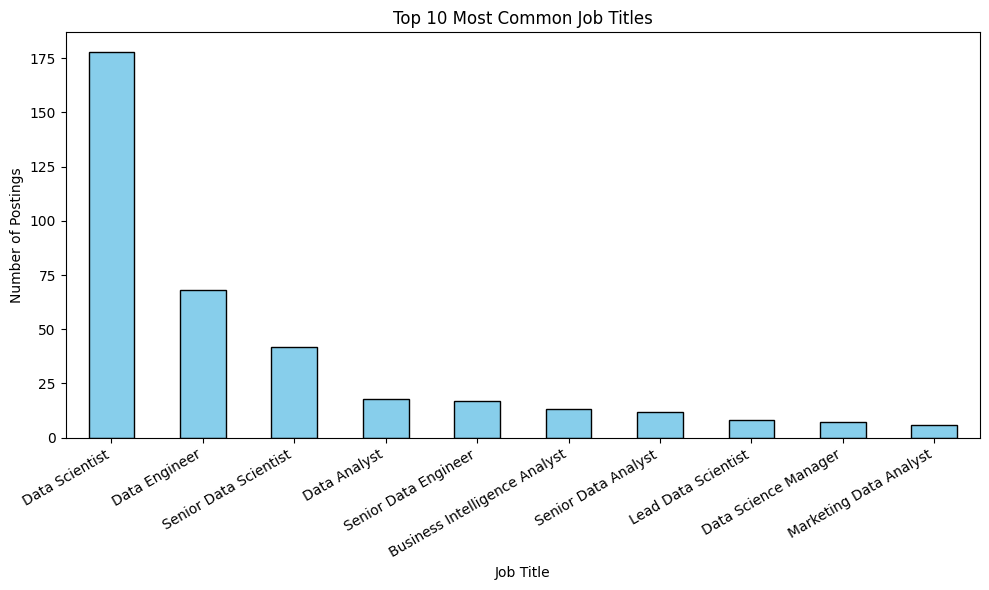

In [174]:
# Count the top 10 most common job titles
top_jobs = df["Job Title"].value_counts().head(10)
# Plot as a column chart
plt.figure(figsize=(10,6))
top_jobs.plot(kind="bar", color="skyblue", edgecolor="black")
plt.xlabel("Job Title")
plt.ylabel("Number of Postings")
plt.title("Top 10 Most Common Job Titles")
plt.xticks(rotation=30, ha="right")

plt.tight_layout()
plt.show()

In [175]:
# Check how many "-1" values exist in column Salary (missing value)
print("Number of rows with missing value salary:", (df["Salary Estimate"] == "-1").sum())

Number of rows with missing value salary: 214


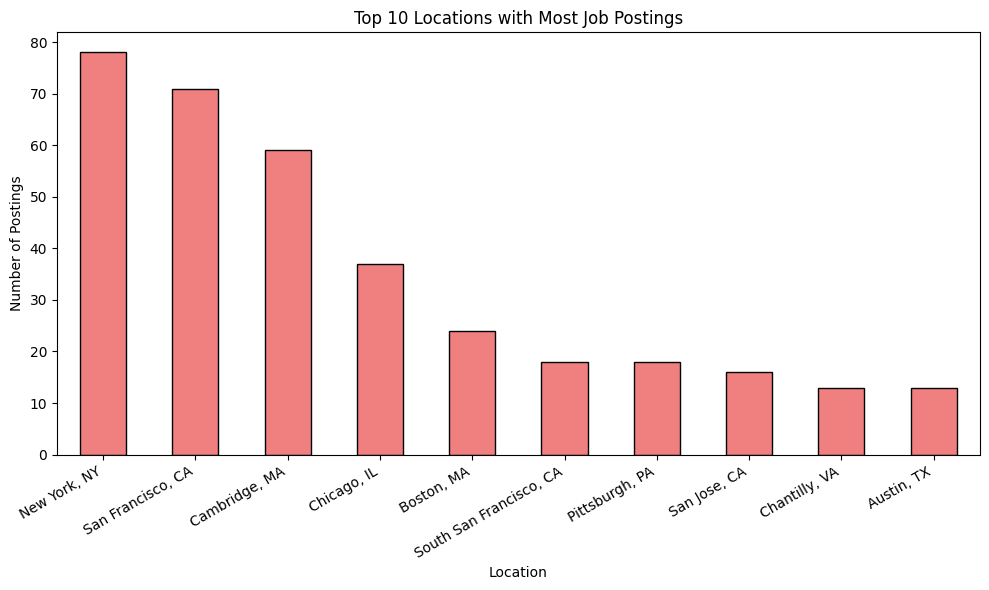

In [176]:
#Most Common Locations
top_location = df["Location"].value_counts().head(10)

plt.figure(figsize=(10,6))
top_location.plot(kind="bar", color="lightcoral", edgecolor="black")
plt.title("Top 10 Locations with Most Job Postings")
plt.xlabel("Location")
plt.ylabel("Number of Postings")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()

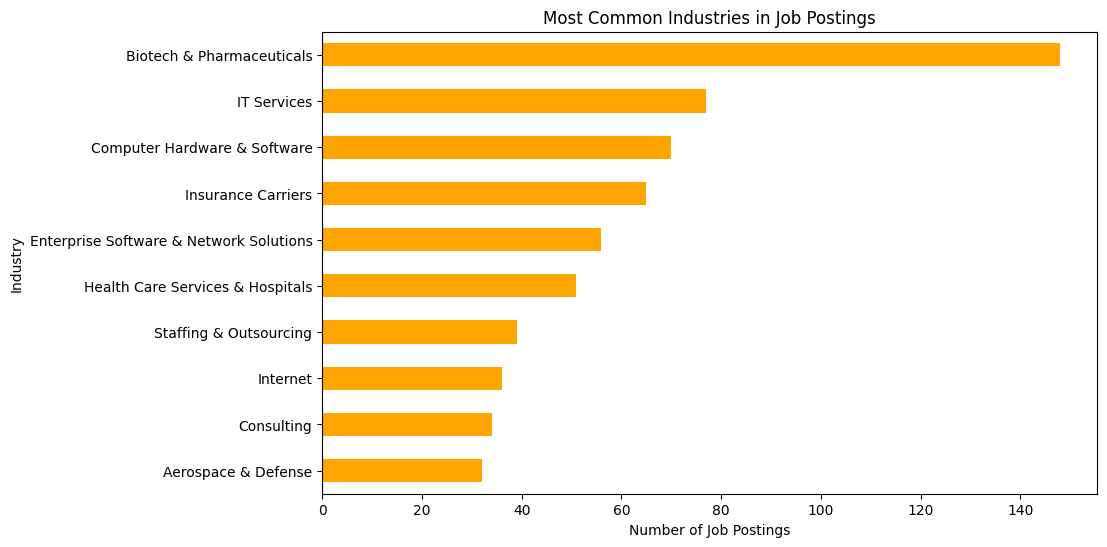

In [177]:
# pick top 10 industries
df_filtered = df[df["Industry"] != "-1"]
top_industries = df_filtered["Industry"].value_counts().head(10)
# Plot horizontal bar chart
plt.figure(figsize=(10,6))
top_industries.sort_values().plot(kind='barh', color='orange')
plt.xlabel("Number of Job Postings")
plt.ylabel("Industry")
plt.title("Most Common Industries in Job Postings")
plt.show()

In [178]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [179]:
def clean_text(text):
    text = text.lower()  # lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # remove punctuation/numbers
    text = re.sub(r'\s+', ' ', text)  # remove extra spaces
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if len(word) > 1])  # lemmatize & remove single chars
    return text

cleaned_descriptions = df["Job Description"].dropna().apply(clean_text)

In [180]:
# Join all descriptions into one string
text = " ".join(cleaned_descriptions)

In [181]:
# Define stopwords
from wordcloud import STOPWORDS
custom_stopwords = set(STOPWORDS)
custom_stopwords.update(stopwords.words('english'))
custom_stopwords.update([
    "experience", "work", "team", "skills", "job", "knowledge",
    "years", "responsibilities", "requirements", "ability",
    "including", "preferred", "etc", "must", "using",
    "responsible", "strong", "excellent", "good"
])

In [182]:
# Generate word cloud
from wordcloud import WordCloud
wc = WordCloud(
    width=1000,
    height=600,
    background_color="white",
    stopwords=custom_stopwords,
    colormap="plasma"
).generate(text)

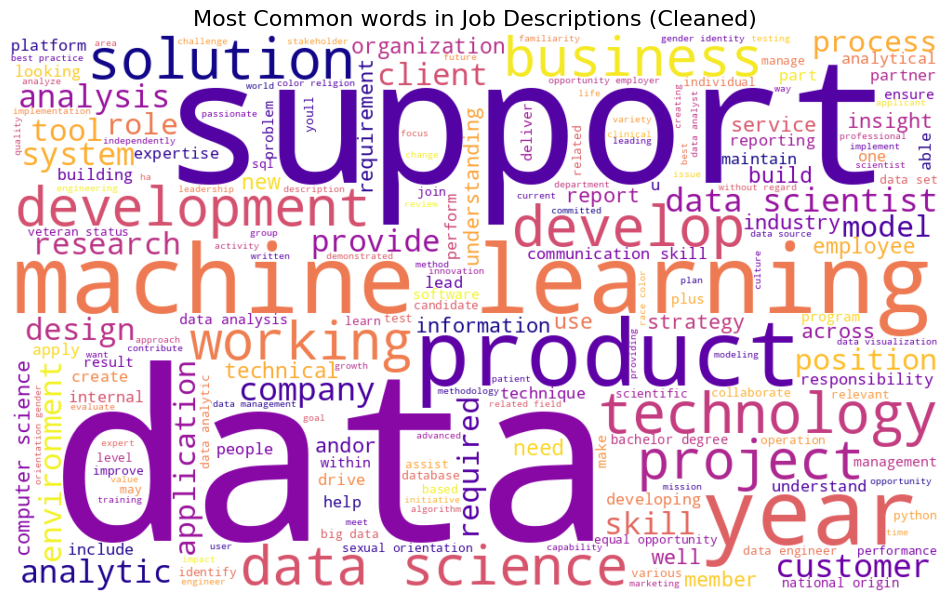

In [183]:
# Plot word cloud
plt.figure(figsize=(12,8))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common words in Job Descriptions (Cleaned)", fontsize=16)
plt.show()

## Divide into 3 groups

In [184]:
from nltk.stem import PorterStemmer
import nltk

# Initialize stemmer
stemmer = PorterStemmer()
# Function to stem a text
def stem_text(text):
    tokens = text.lower().split()  # lowercase + split by space
    return " ".join([stemmer.stem(token) for token in tokens])
# Apply stemming to Job Title column
df["Job Title Stem"] = df["Job Title"].astype(str).apply(stem_text)

print(df[["Job Title", "Job Title Stem"]].head(10))
df["Group"] = "Other"
# Assign groups
df.loc[df["Job Title Stem"].str.contains("data scientist|data scienc"), "Group"] = "Data Scientist"
df.loc[df["Job Title Stem"].str.contains("data engin"), "Group"] = "Data Engineer"
df.loc[df["Job Title Stem"].str.contains("data analyst|data analyt|data analysi"), "Group"] = "Data Analyst"

print(df["Group"].value_counts())

# Keep only the 3 main groups (exclude Others)
df_groups = df[df["Group"].isin(["Data Scientist", "Data Engineer", "Data Analyst"])]

print("Shape after filtering:", df_groups.shape)
print(df_groups[["Job Title", "Job Title Stem", "Group"]].head(10))

                   Job Title            Job Title Stem
0             Data Scientist            data scientist
1  Healthcare Data Scientist  healthcar data scientist
2             Data Scientist            data scientist
3             Data Scientist            data scientist
4             Data Scientist            data scientist
5             Data Scientist            data scientist
6             Data Scientist            data scientist
7             Data Scientist            data scientist
8         Research Scientist        research scientist
9             Data Scientist            data scientist
Group
Data Scientist    399
Other             285
Data Engineer     158
Data Analyst      114
Name: count, dtype: int64
Shape after filtering: (671, 16)
                    Job Title            Job Title Stem           Group
0              Data Scientist            data scientist  Data Scientist
1   Healthcare Data Scientist  healthcar data scientist  Data Scientist
2              Data Scient

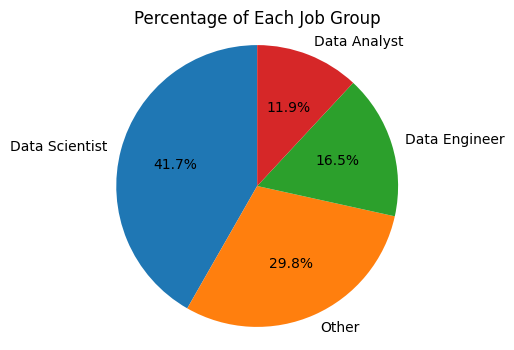

In [185]:
# Get the count of each group
group_counts = df["Group"].value_counts()

# Calculate the percentage for each group
group_percentages = (group_counts / group_counts.sum()) * 100

# Plot the pie chart
plt.figure(figsize=(4, 4))
plt.pie(
    group_percentages,
    labels=group_percentages.index,
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Percentage of Each Job Group")
plt.axis("equal")
plt.show()

            Group        mean  median  count
0    Data Analyst   67.038462    61.0    104
1   Data Engineer  105.173729    99.5    118
2  Data Scientist  117.160131   112.5    306


<>:10: SyntaxWarning: invalid escape sequence '\$'
<>:10: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-3543877776.py:10: SyntaxWarning: invalid escape sequence '\$'
  .str.replace("\$", "", regex=True)


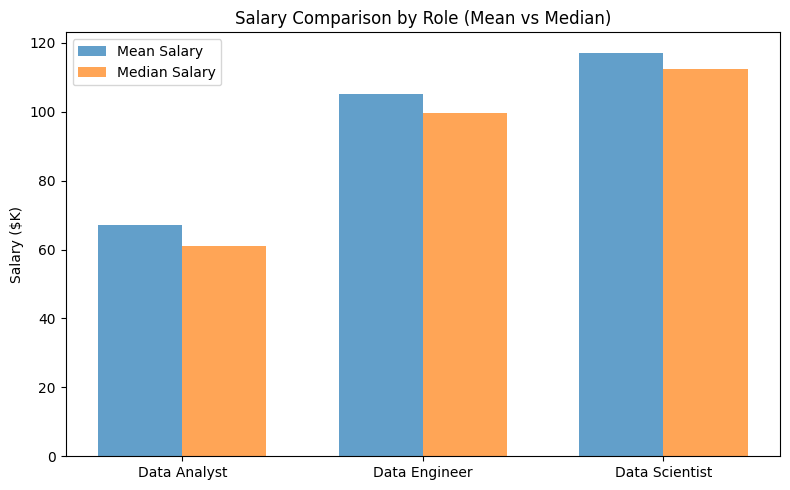

In [186]:
import matplotlib.pyplot as plt

# Create a copy without hourly salaries
df_salary = df_groups[~df_groups["Salary Estimate"].str.contains("per hour", case=False, na=False)].copy()

df_salary["Salary_Clean"] = (
    df_salary["Salary Estimate"]
    .str.replace(r"\(.*\)", "", regex=True)   # remove (Glassdoor est.) or (Employer est.)
    .str.replace("K", "", regex=False)
    .str.replace("\$", "", regex=True)
    .str.strip()
)
# Extract min and max salary
df_salary["min_salary"] = df_salary["Salary_Clean"].apply(
    lambda x: int(re.findall(r"^\d+", x)[0]) if re.findall(r"^\d+", x) else None
)
df_salary["max_salary"] = df_salary["Salary_Clean"].apply(
    lambda x: int(re.findall(r"(\d+)$", x)[0]) if re.findall(r"(\d+)$", x) else None
)

# If only one number, min=max
df_salary.loc[df_salary["max_salary"].isna(), "max_salary"] = df_salary["min_salary"]

# Drop rows without group
df_salary = df_salary.dropna(subset=["Group"])

# Calculate average salary
df_salary["avg_salary"] = (df_salary["min_salary"] + df_salary["max_salary"]) / 2
# Salary stats by group
group_salary_stats = df_salary.groupby("Group")["avg_salary"].agg(["mean", "median", "count"]).reset_index()
print(group_salary_stats)

# Plot mean vs median salaries
plt.figure(figsize=(8,5))
bar_width = 0.35
groups = group_salary_stats["Group"]

x = range(len(groups))
plt.bar([p - bar_width/2 for p in x], group_salary_stats["mean"],
        width=bar_width, label="Mean Salary", alpha=0.7)
plt.bar([p + bar_width/2 for p in x], group_salary_stats["median"],
        width=bar_width, label="Median Salary", alpha=0.7)

plt.xticks(x, groups)
plt.ylabel("Salary ($K)")
plt.title("Salary Comparison by Role (Mean vs Median)")
plt.legend()
plt.tight_layout()
plt.show()

## Clustering

In [188]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

vectorizer = TfidfVectorizer(stop_words="english", max_features=2000, ngram_range=(1,2))
vectorizer.fit(df['Job Description'])
tokenizer = vectorizer.build_tokenizer()

# Function to run clustering on job descriptions within each group
def cluster_group(df_group, group_name, n_clusters=3):
    print(f"\n Clustering for {group_name} ")

    # Extract job descriptions
    descriptions = df_group["Job Description"].dropna().apply(clean_text).tolist()

    # Convert to TF-IDF matrix
    # Use unigrams + bigrams (1 or 2 word phrases)
    X = vectorizer.transform(descriptions)

    # Run KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)

    # Print top keywords per cluster
    terms = vectorizer.get_feature_names_out()
    cluster_term_dict = {}
    for i in range(n_clusters):
        cluster_terms = [terms[j] for j in kmeans.cluster_centers_[i].argsort()[-100:]]
        top_10_terms = [term for term in cluster_terms[-10:]]
        print(f"Cluster {i+1}: {', '.join(top_10_terms)}")
        cluster_term_dict[i] = cluster_terms

    # Step 5: Assign clusters back to dataframe
    df_group = df_group.copy()
    df_group["Cluster"] = kmeans.labels_

    return df_group, cluster_term_dict

# Run clustering for each group
df_ds, ds_terms = cluster_group(df_groups[df_groups["Group"]=="Data Scientist"], "Data Scientist", n_clusters=3)
df_de, de_terms = cluster_group(df_groups[df_groups["Group"]=="Data Engineer"], "Data Engineer", n_clusters=3)
df_da, da_terms = cluster_group(df_groups[df_groups["Group"]=="Data Analyst"], "Data Analyst", n_clusters=3)

# Combine results
df_clustered = pd.concat([df_ds, df_de, df_da])

# Preview results
print("\nSample results with clusters:")
print(df_clustered[["Job Title", "Group", "Cluster"]].head(5))


 Clustering for Data Scientist 
Cluster 1: project, qualification, customer, year, solution, experience, model, tool, data, skill
Cluster 2: insight, tool, solution, science, year, learning, model, experience, skill, data
Cluster 3: regulatory, employee, trial, disease, data scientist, study, clinical, application, data, pfizer

 Clustering for Data Engineer 
Cluster 1: practice, data pipeline, pipeline, data engineer, engineer, experience, tool, solution, skill, data
Cluster 2: data engineer, data pipeline, team, infrastructure, year, platform, pipeline, engineer, experience, data
Cluster 3: technology, data engineer, engineer, tool, database, solution, experience, skill, year, data

 Clustering for Data Analyst 
Cluster 1: bank, identify, ability, analysis experience, analysis, solution, information, data, security, threat
Cluster 2: management, care, client, clinical, year, healthcare, analyst, product, vendor, data
Cluster 3: customer, year, marketing, analyst, experience, tool, r

In [189]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_wordclouds(df, df_terms, group_name, n_clusters=3):
    """
    Plot word clouds for each cluster within a group
    df : dataframe that contains 'Job Description' and 'Cluster' columns
    group_name : str, e.g. "Data Scientist"
    n_clusters : int, number of clusters
    """
    for i in range(n_clusters):
        cluster_text = " ".join(df[df["Cluster"] == i]["Job Description"].dropna().apply(clean_text))

        if cluster_text.strip():
            tokens = [token for token in tokenizer(cluster_text) if token in df_terms[i]]
            cluster_text = " ".join(tokens)
            wc = WordCloud(width=800, height=500, background_color="white",
                           colormap="viridis").generate(cluster_text)

            plt.figure(figsize=(8,5))
            plt.imshow(wc, interpolation="bilinear")
            plt.axis("off")
            plt.title(f"{group_name} - Cluster {i+1}")
            plt.show()

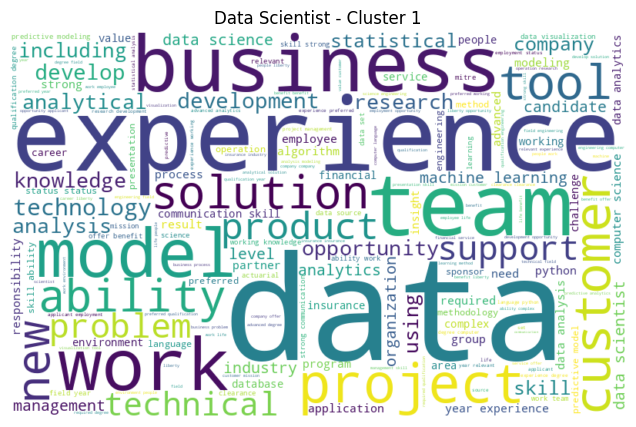

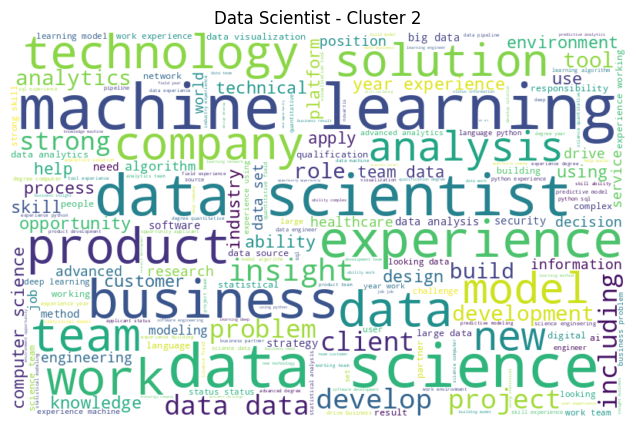

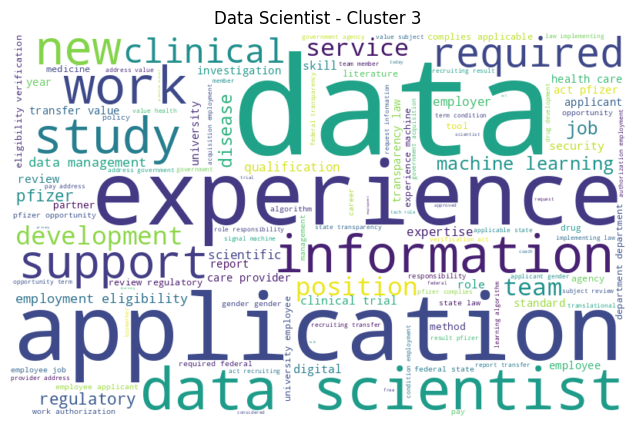

In [190]:
plot_wordclouds(df_ds, ds_terms, "Data Scientist", n_clusters=3)

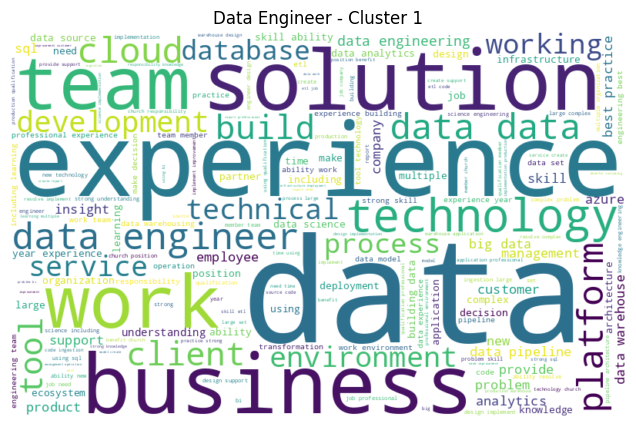

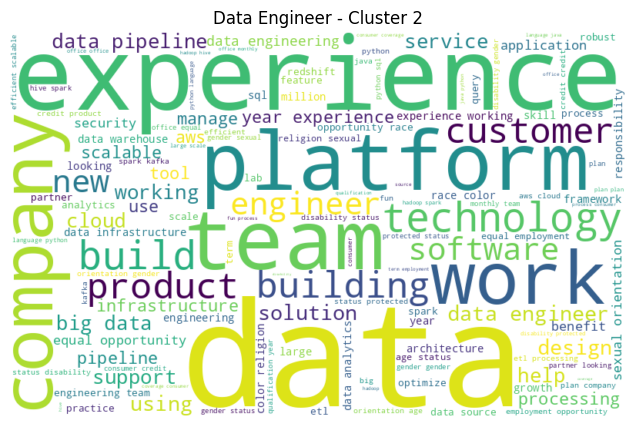

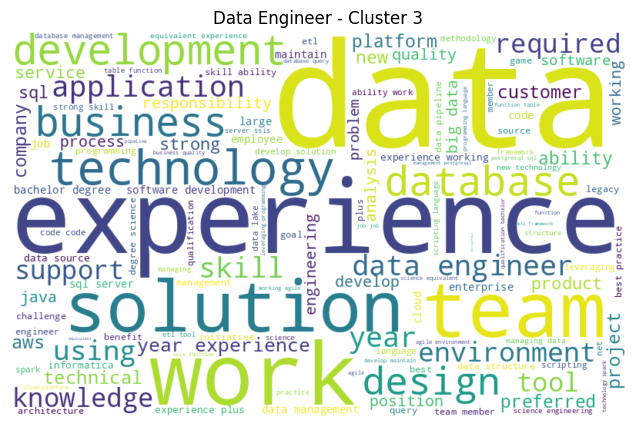

In [191]:
plot_wordclouds(df_de, de_terms, "Data Engineer", n_clusters=3)

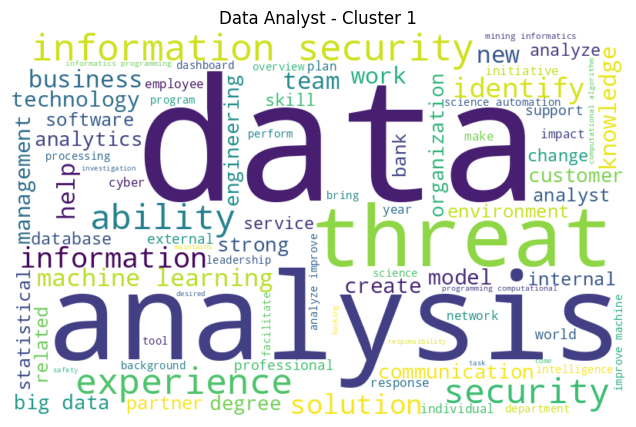

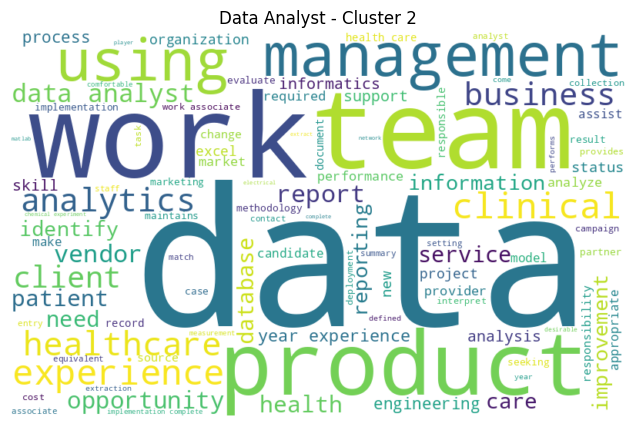

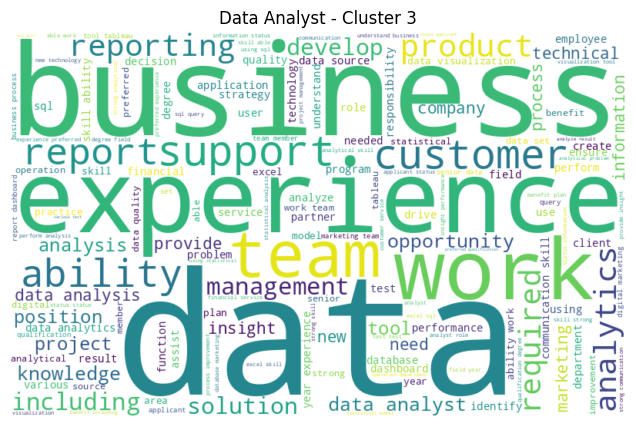

In [192]:
plot_wordclouds(df_da, da_terms, "Data Analyst", n_clusters=3)

## Common Programming Language required

In [193]:
import requests
from bs4 import BeautifulSoup

url = "https://www.bairesdev.com/blog/top-programming-languages/"

# Define a User-Agent header
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
}

try:
    # Fetch the content from the URL
    response = requests.get(url, headers=headers)
    response.raise_for_status()

    # Parse the HTML content
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find all <li> tags
    list_items = soup.find_all('h3')
    list_proglang = set()

    # Print the text content of each <li> tag
    for item in list_items:
        programming_lang = item.get_text(strip=True).split()[1]
        list_proglang.add(programming_lang.lower())
        print(programming_lang)

except requests.exceptions.RequestException as e:
    print(f"Error: Could not retrieve the webpage. {e}")

C
Java
Python
C++
C#
JavaScript
PHP
R
SQL
Go
Swift
Perl
Assembly
Visual
Ruby
MATLAB
Objective-C
Rust
Delphi/Object
Classic
SAS
Scratch
D
Dart
PL/SQL
Logo
COBOL
Kotlin
Julia
ABAP
Scala
Transact-SQL
Scheme
Prolog
Ada
Lisp
Apex
Lua
Fortran
Haskell
Hack
VBScript
TypeScript
AWK
ActionScript
Tcl
Smalltalk
(Visual)
Solidity
PowerShell
ABC
Algol
APL
Bash
Carbon
CFML
CHILL
CLIPS
Clojure
CLU
Crystal
Curl
DiBOL
Eiffel
Elixir
Elm
Erlang
F#
Forth
GAMS
Groovy
Icon
Inform
Io
J
JScript
LabVIEW
Ladder
ML
Modula-2
Mojo
MQL5
NATURAL
Nim
OCaml
Occam
OpenCL
PL/I
PureScript
Q
Ring
RPG
S
SPARK
Stata
SystemVerilog
VHDL
Wolfram
X++
Zig


In [194]:
import re
from collections import Counter


def proglang_wordcloud(df, job_name="All"):
    lowered_descriptions = df["Job Description"].dropna().apply(lambda x: x.lower())

    # Extract skills
    skills_found = []

    for desc in lowered_descriptions:
        for skill in list_proglang:
            # Check if skill appears as a whole word
            if re.search(r'\b' + re.escape(skill.lower()) + r'\b', desc):
                skills_found.append(skill)

    # Count frequency of each skill
    skill_counts = Counter(skills_found)
    print(skill_counts)

    wc = WordCloud(
        width=1000,
        height=600,
        background_color="white",
        colormap="plasma"
    ).generate_from_frequencies(skill_counts)

    plt.figure(figsize=(6,4))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Most Demanded Technical Skills - {job_name}", fontsize=16)
    plt.show()

Counter({'s': 735, 'python': 492, 'sql': 462, 'r': 358, 'spark': 199, 'd': 169, 'java': 160, 'c': 106, 'sas': 96, 'scala': 96, 'natural': 89, 'ml': 86, 'matlab': 64, 'go': 63, 'javascript': 58, 'inform': 47, 'visual': 36, 'ruby': 19, 'j': 18, 'perl': 16, 'bash': 10, 'q': 10, 'assembly': 9, 'ada': 8, 'pl/sql': 7, 'forth': 7, 'stata': 6, 'julia': 6, 'io': 6, 'php': 5, 'groovy': 5, 'crystal': 4, 'typescript': 4, 'clojure': 3, 'swift': 3, 'tcl': 3, 'scratch': 2, 'rust': 2, 'icon': 2, 'apex': 1, 'apl': 1, 'ladder': 1, 'kotlin': 1, 'vhdl': 1, 'gams': 1, 'awk': 1})


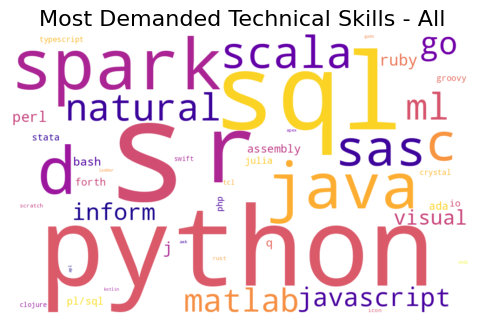

In [195]:
proglang_wordcloud(df)

Counter({'s': 308, 'python': 302, 'r': 233, 'sql': 208, 'spark': 101, 'java': 67, 'd': 66, 'sas': 64, 'ml': 64, 'natural': 49, 'c': 46, 'scala': 46, 'matlab': 41, 'inform': 29, 'go': 25, 'javascript': 20, 'q': 10, 'perl': 10, 'visual': 10, 'bash': 5, 'stata': 5, 'julia': 4, 'clojure': 3, 'ruby': 3, 'forth': 3, 'assembly': 3, 'ada': 2, 'j': 2, 'scratch': 1, 'apl': 1, 'pl/sql': 1, 'gams': 1, 'rust': 1, 'icon': 1, 'swift': 1})


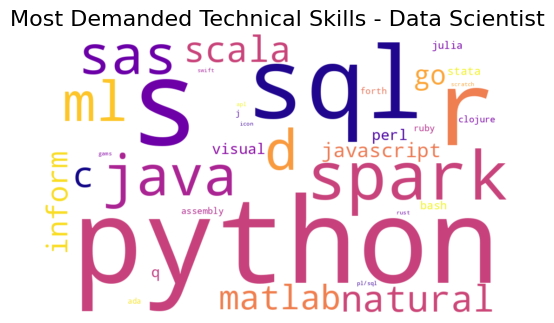

In [196]:
proglang_wordcloud(df_ds, "Data Scientist")

Counter({'s': 127, 'sql': 110, 'python': 97, 'spark': 80, 'java': 65, 'scala': 39, 'd': 18, 'javascript': 16, 'r': 14, 'c': 14, 'go': 13, 'ruby': 10, 'io': 6, 'groovy': 5, 'ml': 5, 'visual': 4, 'perl': 4, 'php': 3, 'pl/sql': 3, 'ada': 3, 'tcl': 3, 'bash': 2, 'sas': 2, 'swift': 2, 'kotlin': 1, 'matlab': 1, 'awk': 1, 'natural': 1})


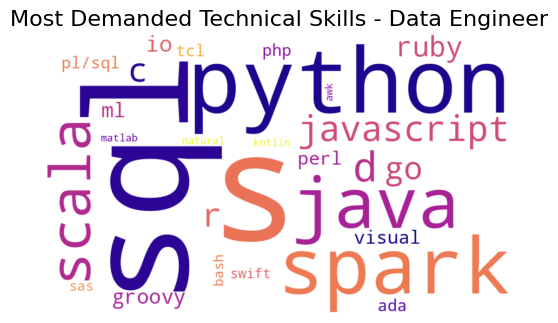

In [197]:
proglang_wordcloud(df_de, "Data Engineer")

Counter({'s': 93, 'sql': 79, 'python': 35, 'r': 33, 'visual': 15, 'sas': 13, 'd': 9, 'c': 7, 'go': 7, 'natural': 7, 'spark': 6, 'inform': 6, 'matlab': 6, 'javascript': 6, 'java': 3, 'ml': 3, 'forth': 3, 'scala': 2, 'assembly': 2, 'pl/sql': 1, 'ada': 1, 'stata': 1, 'icon': 1})


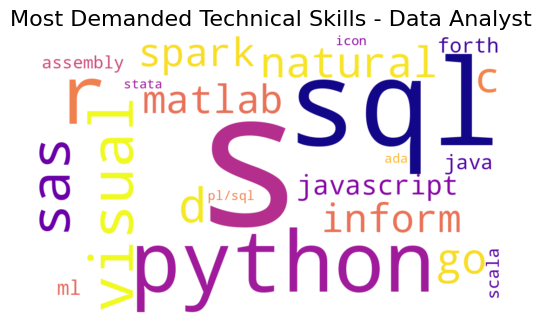

In [198]:
proglang_wordcloud(df_da, "Data Analyst")